In [ ]:
import pandas as pd
import numpy as np
import random as rd
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from random import choices

pd.set_option('display.max_columns', None)
# Set random seed for reproducibility
np.random.seed(888)

In [4]:
# Initalising the DataFrame 
df = pd.DataFrame( 
    columns = ['customer_id', 
              'has_mobile_app', 
              'has_web_account',
              'mobile_logins_wk',
              'web_logins_wk',
              'avg_mobile_time',
              'avg_web_time',
              'last_mobile_use',
              'last_web_use',
              ])
df

,customer_id,has_mobile_app,has_web_account,mobile_logins_wk,web_logins_wk,avg_mobile_time,avg_web_time,last_mobile_use,last_web_use


In [5]:
# Sequentially generate customer_ids from 1 to 4000
df.customer_id = [i for i in range(1, 4001)]

# Generate mobile_app_ownership, fixing at 73% of all customers downloaded the mobile app
s = [1] * int(4000 * 0.73) + [0] * int(4000 *(1-0.73))
rd.shuffle(s)
df.has_mobile_app = s

# Generating web_account ownership, fixing at 88% of all customers owning the web account,
# with the majority of the 88% also owning the mobile_app
df.has_web_account = [i if i == 1 else 0 for i in df.has_mobile_app]
indicies = df[df.has_web_account == 0].index
num_to_replace = int(4000 * 0.15)
replace_indices = np.random.choice(indicies, num_to_replace, replace=False)
df.loc[replace_indices, 'has_web_account'] = 1

In [6]:
# Breakdown of web account and mobile app ownership
df.groupby(by=['has_web_account', 'has_mobile_app']).count()

customer_id  mobile_logins_wk  web_logins_wk  \
has_web_account has_mobile_app                                                 
0               0                       480                 0              0   
1               0                       600                 0              0   
                1                      2920                 0              0   

                                avg_mobile_time  avg_web_time  \
has_web_account has_mobile_app                                  
0               0                             0             0   
1               0                             0             0   
                1                             0             0   

                                last_mobile_use  last_web_use  
has_web_account has_mobile_app                                 
0               0                             0             0  
1               0                             0             0  
                1                             0             0

In [7]:
# Initalising the rest of the columns accordingly, ensuring NaNs in the appropriate indicies
df.mobile_logins_wk = [i if i == 1 else np.nan for i in df.has_mobile_app]
df.avg_mobile_time = [i if i == 1 else np.nan for i in df.has_mobile_app]
df.last_mobile_use = [i if i == 1 else np.nan for i in df.has_mobile_app]

df.web_logins_wk = [i if i == 1 else np.nan for i in df.has_web_account]
df.avg_web_time = [i if i == 1 else np.nan for i in df.has_web_account]
df.last_web_use = [i if i == 1 else np.nan for i in df.has_web_account]

In [8]:
num_of_mobile_users = int(4000 * 0.73) + 1
# Light users (10%): Exponential distribution shifted to stay in 0-2 range
light_users = stats.expon(scale=1.5).rvs(size=int(num_of_mobile_users * 0.1))
light_users = np.clip(light_users, 0, 2).astype(int)

# Normal users (70%): Normal distribution centered at 5, clipped between 3-9
normal_users = stats.norm(loc=5, scale=2).rvs(size=int(num_of_mobile_users * 0.7))
normal_users = np.clip(normal_users, 3, 9).astype(int)

# Heavy users (20%): Normal distribution centered at 11, clipped between 10-12
heavy_users = stats.norm(loc=11, scale=3).rvs(size=int(num_of_mobile_users * 0.2))
heavy_users = np.clip(heavy_users, 10, 12).astype(int)

# Combine all user logins
avg_mobile_logins = np.concatenate([light_users, normal_users, heavy_users])
np.random.shuffle(avg_mobile_logins)

indicies = df[df.mobile_logins_wk == 1].index
df.loc[indicies, "mobile_logins_wk"] = avg_mobile_logins

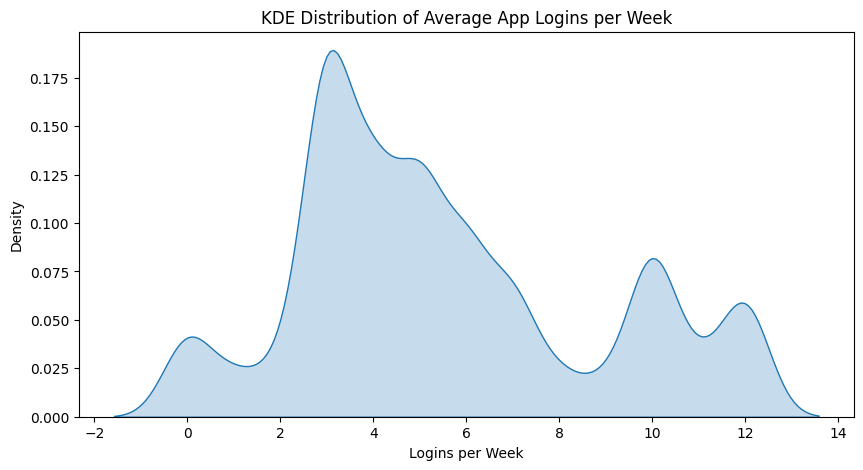

In [9]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['mobile_logins_wk'], fill=True, bw_adjust=.8)
plt.xlabel("Logins per Week")
plt.ylabel("Density")
plt.title("KDE Distribution of Average App Logins per Week")
plt.show()

In [10]:
num_of_web_users = int(4000 * 0.88)
# Light users (40%): Exponential distribution shifted to stay in 0-2 range
light_users = stats.expon(scale=1.5).rvs(size=int(num_of_web_users * 0.4))
light_users = np.clip(light_users, 0, 2).astype(int)

# Normal users (40%): Normal distribution centered at 4, clipped between 3-5
normal_users = stats.norm(loc=4, scale=2).rvs(size=int(num_of_web_users * 0.4))
normal_users = np.clip(normal_users, 3, 5).astype(int)

# Heavy users (20%): Normal distribution centered at 11, clipped between 6-10
heavy_users = stats.norm(loc=7, scale=2).rvs(size=int(num_of_web_users * 0.2))
heavy_users = np.clip(heavy_users, 6, 10).astype(int)

# Combine all user logins
avg_web_logins = np.concatenate([light_users, normal_users, heavy_users])
np.random.shuffle(avg_web_logins)

indicies = df[df.web_logins_wk == 1].index
df.loc[indicies, "web_logins_wk"] = avg_web_logins

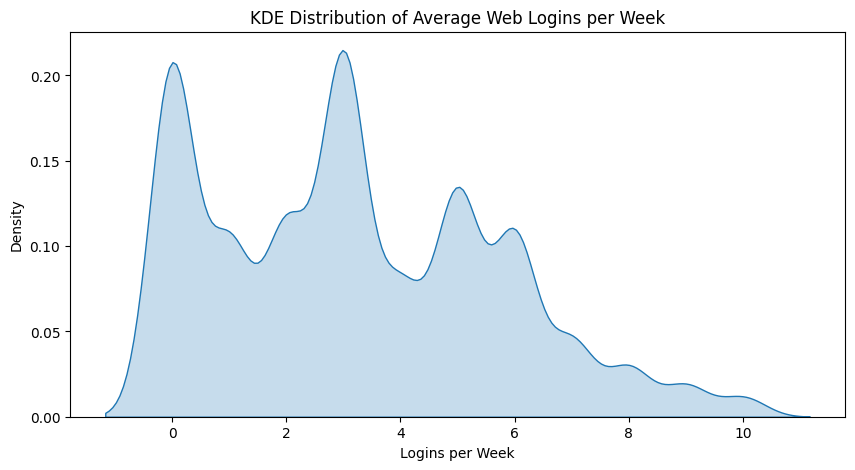

In [11]:
plt.figure(figsize=(10, 5))
sns.kdeplot(avg_web_logins, fill=True, bw_adjust=.8)
plt.xlabel("Logins per Week")
plt.ylabel("Density")
plt.title("KDE Distribution of Average Web Logins per Week")
plt.show()

In [12]:
num_of_mobile_users = int(4000 * 0.73) + 1

# Light users (10%): Normal distribution centered at 2 minutes, clipped between 0-3 minutes
light_sessions = stats.norm(loc=2, scale=0.5).rvs(size=int(num_of_mobile_users * 0.2))
light_sessions = np.clip(light_sessions, 0, 3)

# Normal users (70%): Normal distribution centered at 5.5 minutes, clipped between 3-8 minutes
normal_sessions = stats.norm(loc=5.5, scale=1).rvs(size=int(num_of_mobile_users * 0.7))
normal_sessions = np.clip(normal_sessions, 3, 8)

# Heavy users (20%): Normal distribution centered at 7 minutes, clipped between 5-10 minutes
heavy_sessions = stats.norm(loc=7, scale=1).rvs(size=int(num_of_mobile_users * 0.1))
heavy_sessions = np.clip(heavy_sessions, 5, 10)

np.random.shuffle(light_sessions)
np.random.shuffle(normal_sessions)
np.random.shuffle(heavy_sessions)

indicies = df[(0 <= df.mobile_logins_wk)  &  (df.mobile_logins_wk <= 2)].index
df.loc[indicies, "avg_mobile_time"] = heavy_sessions
df.loc[df[df.mobile_logins_wk == 0].index, "avg_mobile_time"] = 0

indicies = df[(3 <= df.mobile_logins_wk)  &  (df.mobile_logins_wk <= 9)].index
df.loc[indicies, "avg_mobile_time"] = normal_sessions

indicies = df[(10 <= df.mobile_logins_wk)  &  (df.mobile_logins_wk <= 12)].index
df.loc[indicies, "avg_mobile_time"] = light_sessions

df["avg_mobile_time"] = df["avg_mobile_time"].apply(lambda x: np.round(x, 2) if pd.notna(x) else x)

/Users/wakaka/Desktop/TB/dsa3101/dsa3101-bank-marketing-group-1/.venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Average time spent in a single mobile session (mins)')

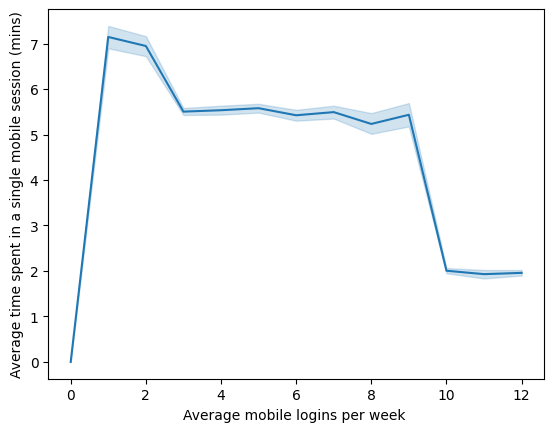

In [13]:
# Relationship of average weekly mobile logins and average time spent in a single mobile session
sns.lineplot(df.mobile_logins_wk, df.avg_mobile_time)
plt.xlabel("Average mobile logins per week ")
plt.ylabel("Average time spent in a single mobile session (mins)")

In [14]:
num_of_web_users = int(4000 * 0.88) 

# Light users (10%): Normal distribution centered at 2 minutes, clipped between 1-3 minutes
light_sessions = stats.norm(loc=2, scale=0.5).rvs(size=int(num_of_web_users * 0.2))
light_sessions = np.clip(light_sessions, 0, 5)

# Normal users (70%): Normal distribution centered at 5.5 minutes, clipped between 3-8 minutes
normal_sessions = stats.norm(loc=8, scale=1).rvs(size=int(num_of_web_users * 0.4))
normal_sessions = np.clip(normal_sessions, 6, 16)

# Heavy users (20%): Normal distribution centered at 7 minutes, clipped between 5-10 minutes
heavy_sessions = stats.norm(loc=16, scale=1).rvs(size=int(num_of_web_users * 0.4))
heavy_sessions = np.clip(heavy_sessions, 10, 30)

np.random.shuffle(light_sessions)
np.random.shuffle(normal_sessions)
np.random.shuffle(heavy_sessions)

indicies = df[(0 <= df.web_logins_wk)  &  (df.web_logins_wk <= 2)].index
df.loc[indicies, "avg_web_time"] =  heavy_sessions 
df.loc[df[df.web_logins_wk == 0].index, "avg_web_time"] = 0

indicies = df[(3 <= df.web_logins_wk)  &  (df.web_logins_wk <= 5)].index
df.loc[indicies, "avg_web_time"] = normal_sessions

indicies = df[(6 <= df.web_logins_wk)  &  (df.web_logins_wk <= 10)].index
df.loc[indicies, "avg_web_time"] =  light_sessions

df["avg_web_time"] = df["avg_web_time"].apply(lambda x: np.round(x, 2) if pd.notna(x) else x)

/Users/wakaka/Desktop/TB/dsa3101/dsa3101-bank-marketing-group-1/.venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


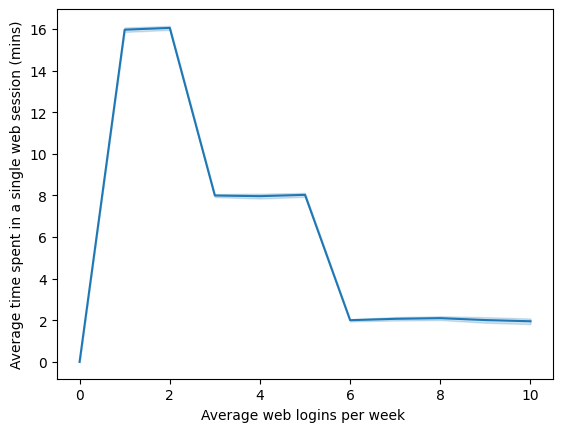

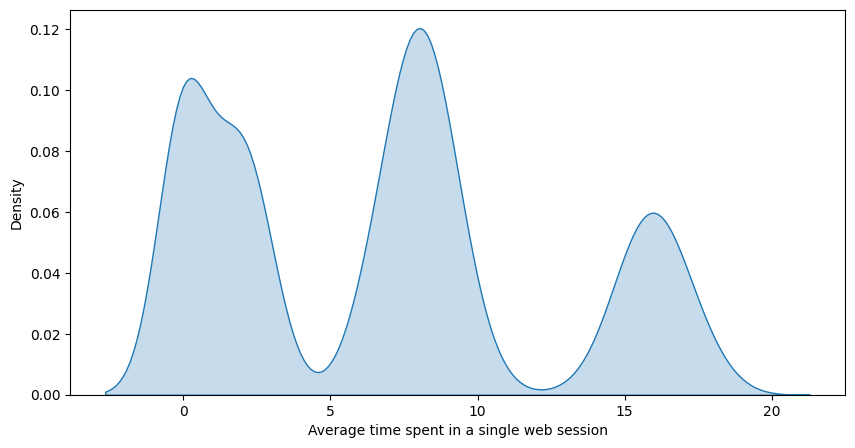

In [15]:
# Relationship of average weekly web logins and average time spent in a single web session
sns.lineplot(df.web_logins_wk, df.avg_web_time)
plt.xlabel("Average web logins per week ")
plt.ylabel("Average time spent in a single web session (mins)")


plt.figure(figsize=(10, 5))
sns.kdeplot(df.avg_web_time, fill=True, bw_adjust=.8)
plt.xlabel("Average time spent in a single web session")
plt.ylabel("Density")
plt.show()

In [16]:
# Generate the last web login times
indicies = df[(10 <= df.avg_web_time)  &  (df.avg_web_time <= 30)].index

test_date1, test_date2 = date(2024, 12, 20), date(2024, 12, 31)
K = len(indicies)
res_dates = [test_date1]
while test_date1 != test_date2:
    test_date1 += timedelta(days=1)
    res_dates.append(test_date1)
res = choices(res_dates, k=K)

df.loc[indicies, 'last_web_use'] = res

indicies = df[(0 <= df.avg_web_time)  &  (df.avg_web_time <= 5)].index

test_date1, test_date2 = date(2023, 1, 1), date(2024, 10, 31)
K = len(indicies)
res_dates = [test_date1]
while test_date1 != test_date2:
    test_date1 += timedelta(days=1)
    res_dates.append(test_date1)
res = choices(res_dates, k=K)

df.loc[indicies, 'last_web_use'] = res


indicies = df[(6 <= df.avg_web_time)  &  (df.avg_web_time <= 16)].index

test_date1, test_date2 = date(2024, 7, 1), date(2024, 11, 30)
K = len(indicies)
res_dates = [test_date1]
while test_date1 != test_date2:
    test_date1 += timedelta(days=1)
    res_dates.append(test_date1)
res = choices(res_dates, k=K)

df.loc[indicies, 'last_web_use'] = res


In [ ]:
# Generate the last mobile login times
indicies = df[(5 <= df.avg_mobile_time) & (df.avg_mobile_time <= 10)].index
test_date1, test_date2 = date(2024, 12, 20), date(2024, 12, 31)
K = len(indicies)
res_dates = [test_date1]
while test_date1 != test_date2:
    test_date1 += timedelta(days=1)
    res_dates.append(test_date1)
res = choices(res_dates, k=K)

df.loc[indicies, 'last_mobile_use'] = res


indicies = df[(0 <= df.avg_mobile_time)  &  (df.avg_mobile_time <= 3)].index
test_date1, test_date2 = date(2023, 1, 1), date(2024, 10, 31)
K = len(indicies)
res_dates = [test_date1]
while test_date1 != test_date2:
    test_date1 += timedelta(days=1)
    res_dates.append(test_date1)
res = choices(res_dates, k=K)

df.loc[indicies, 'last_mobile_use'] = res



indicies = df[(3 <= df.avg_mobile_time)  &  (df.avg_mobile_time <= 8)].index
test_date1, test_date2 = date(2024, 7, 1), date(2024, 11, 30)
K = len(indicies)
res_dates = [test_date1]
while test_date1 != test_date2:
    test_date1 += timedelta(days=1)
    res_dates.append(test_date1)
res = choices(res_dates, k=K)

df.loc[indicies, 'last_mobile_use'] = res

/Users/wakaka/Desktop/TB/dsa3101/dsa3101-bank-marketing-group-1/.venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'mobile_logins_wk')

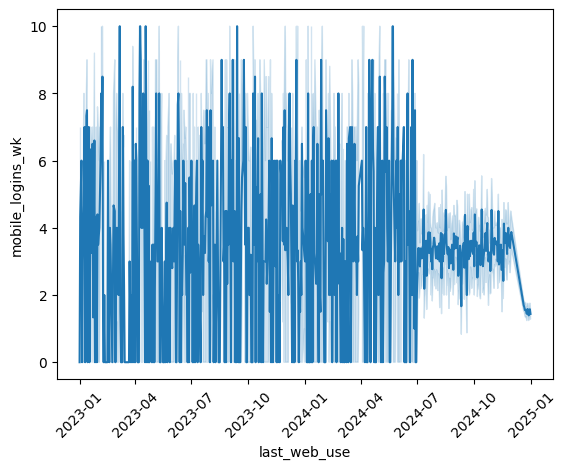

In [21]:
sns.lineplot(df.last_web_use, df.web_logins_wk)
plt.xticks(rotation=45)
plt.ylabel("mobile_logins_wk")

In [ ]:
# convert to csv
df.to_csv("../processed/digital_usage.csv", index=False)